#### Importação das bibliotecas pandas, numpy para os calculos, matplotlib para gráficos, sklearn para criar o modelo de regressão e yellowbrick para a visualização dos residuais.



In [71]:
# importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para a visualização dos residuais 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [72]:
# Carrega a base de dados (arquivo CSV) e conta a quantidade de linhas e colunas (com o arquivo.shape)
base_arquivo = pd.read_csv('reglin.csv')

# Conta a quantidade de instancias e atributos, respectivamente. 
base_arquivo.shape

(1000, 2)

In [73]:
# Mostra os atribuitos (cabeçalho do arquivo) dos dados do arquivo CSV
base_arquivo.head()

,x,y
0,0,51.465284
1,1,51.097878
2,2,50.627379
3,3,52.344402
4,4,52.853691


In [74]:
# Seleciona a linha e a coluna para usar nas variaveis x e y. A parte com .values serve para retornar um array Numpy
x = base_arquivo.iloc[:,0].values
y = base_arquivo.iloc[:,1].values


In [75]:
# calculo de correlação entre x e y

correlacao = np.corrcoef(x, y)
correlacao


array([[1.        , 0.05169117],
       [0.05169117, 1.        ]])

In [76]:
# Formato de matriz com uma coluna a mais

x = x.reshape(-1, 1)

# Criação do modelo e treinamento (fir indica que o treinamento dese ser executado)

modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [77]:
print(f"f(x) = {modelo.coef_}x + {modelo.intercept_}")

f(x) = [0.00015139]x + 51.360474041581014


In [78]:
# Visualização do coeficiente (b)
modelo.intercept_

51.360474041581014

In [79]:
# inclinação da reta (ax)
modelo.coef_

array([0.00015139])

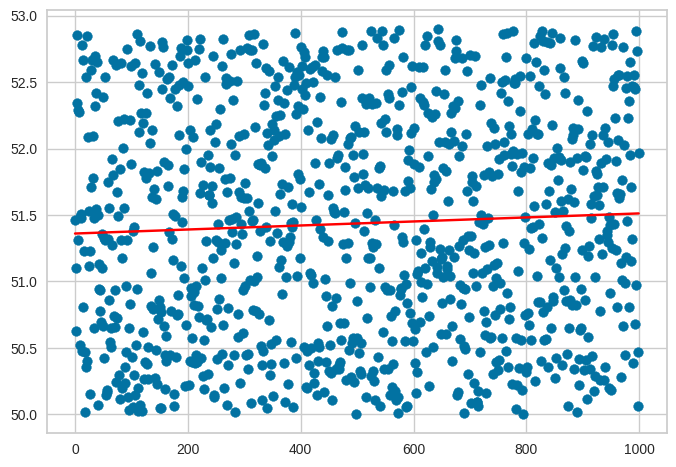

In [80]:
# Geração do grafico com os pontos reais e as previsões
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

In [84]:
# Previsão usando a fórmula manual (ax+b) com x = 22
modelo.intercept_ + modelo.coef_ * 800

array([51.48158672])

In [88]:
# Previsão utilizando função do sklearn
modelo.predict([[100]])

array([51.37561313])

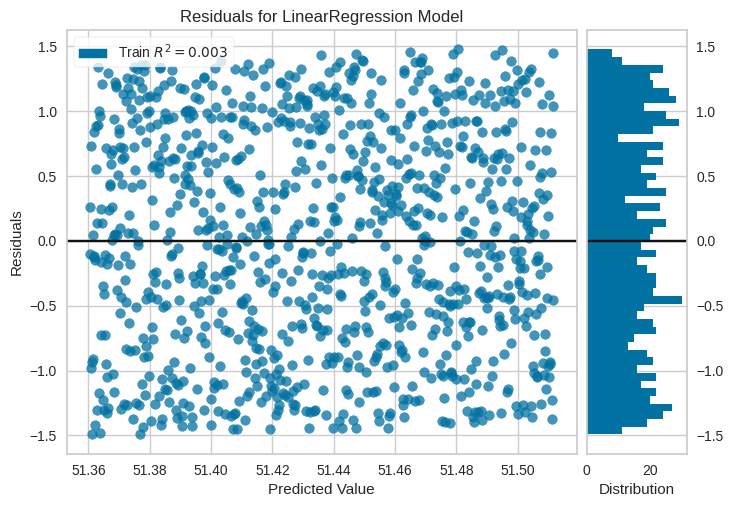

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [86]:
# Gráfico para visualizar as residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()